## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Loading Dataset

In [3]:
laptop_dataset=pd.read_csv("../Dataset/laptop_data.csv",index_col=0)
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# **Performing Explaratory Data Analysis**

In [4]:
laptop_dataset.shape

(1303, 11)

In [5]:
laptop_dataset.isnull().sum().sort_values(ascending=False)

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
laptop_dataset.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [7]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [8]:
for feature in laptop_dataset.columns:
  print("------------------------------------")
  print(laptop_dataset[feature].value_counts())

------------------------------------
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
------------------------------------
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
------------------------------------
Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
------------------------------------
ScreenResolution
Full HD 1920x1080                     

In [9]:
# fixing the Ram and Weight dataset by removing their units and converting to numerical values
laptop_dataset['Ram']=laptop_dataset['Ram'].str.replace('GB','').astype("int32")
laptop_dataset['Weight']=laptop_dataset['Weight'].str.replace('kg','').astype("float64")

In [10]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 117.1+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_23652\1872116290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_dataset['Price'])


<Axes: xlabel='Price', ylabel='Density'>

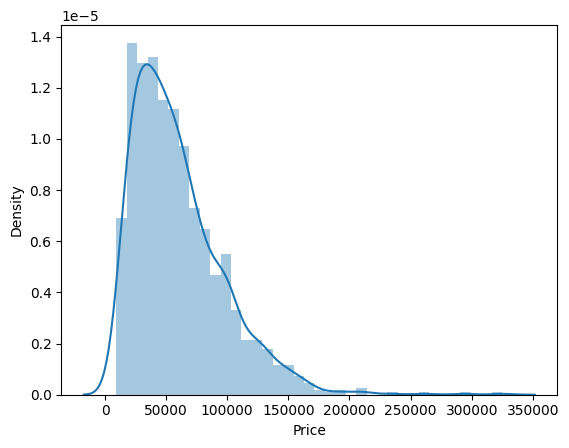

In [11]:
# checking the distribution of the laptop price
sns.distplot(laptop_dataset['Price'])
# our target variable is left-skewed as most of the laptops are low price and very few laptops have a very hugh price

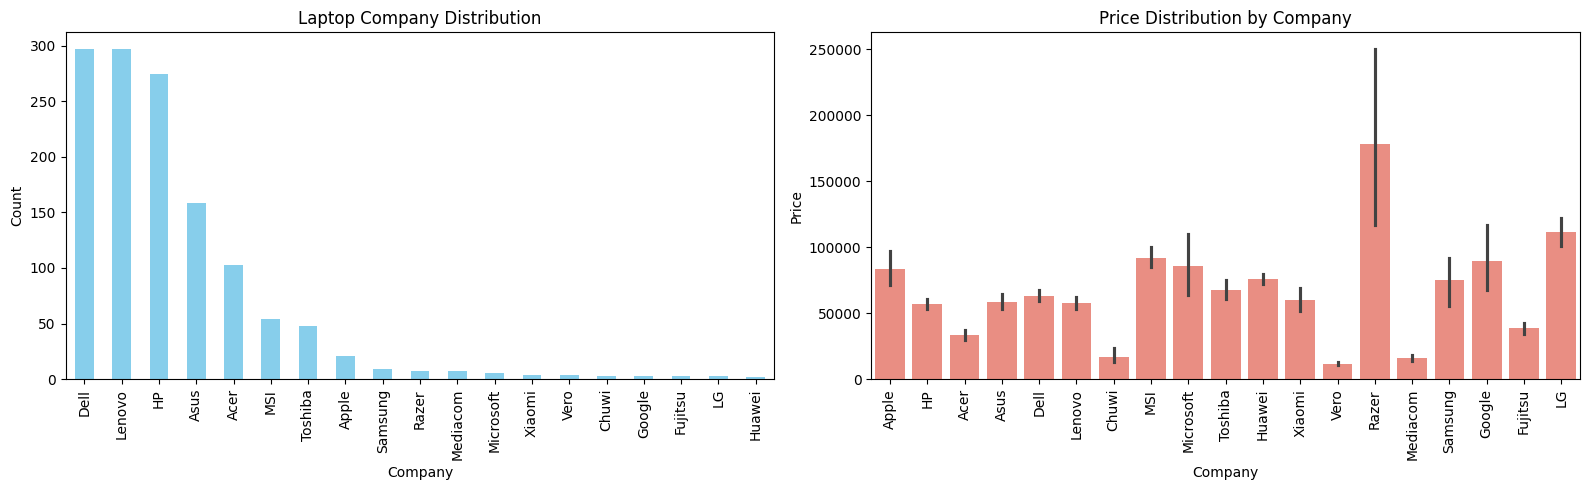

In [12]:
# data visualization for laptop companies, their count and relation with price
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plot Company vs their count
laptop_dataset['Company'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop Company Distribution')
axs[0].set_xlabel('Company')
axs[0].set_ylabel('Count')

# plotting Company vs Price
sns.barplot(x=laptop_dataset['Company'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Company')
axs[1].set_xlabel('Company')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

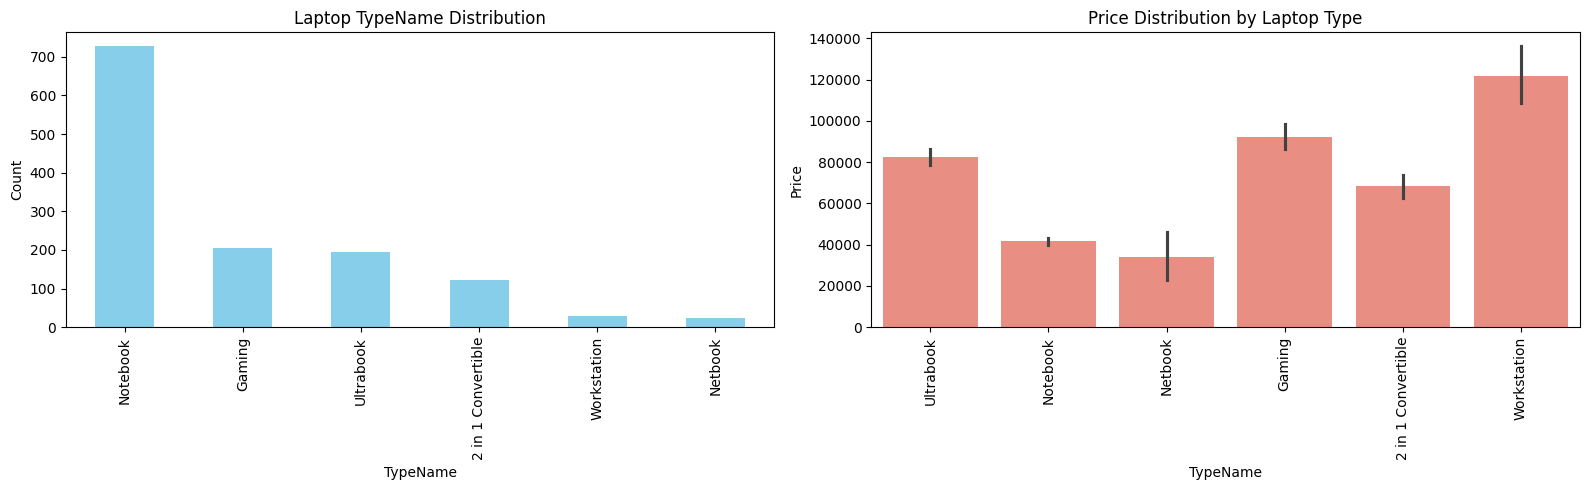

In [13]:
# data visualization for laptop types, their count and relation with price
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plot Laptop Type vs their count
laptop_dataset['TypeName'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop TypeName Distribution')
axs[0].set_xlabel('TypeName')
axs[0].set_ylabel('Count')

# plotting Laptop Type vs Price
sns.barplot(x=laptop_dataset['TypeName'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Laptop Type')
axs[1].set_xlabel('TypeName')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

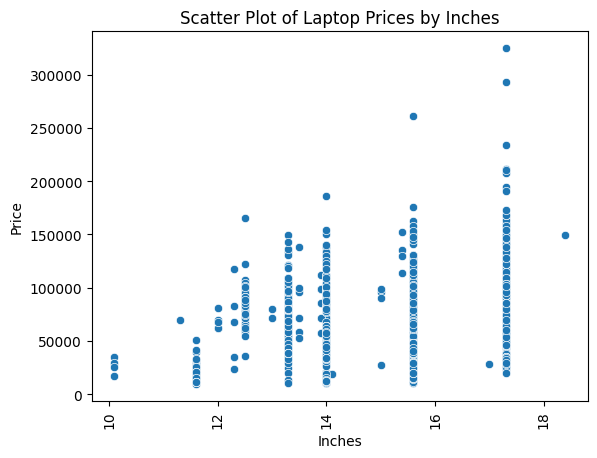

In [14]:
# Create scatter plot
sns.scatterplot(x=laptop_dataset['Inches'], y=laptop_dataset['Price'])
plt.xlabel('Inches')
plt.ylabel('Price')
plt.title('Scatter Plot of Laptop Prices by Inches')

plt.xticks(rotation="vertical")
plt.show()

###### In conclusion, Company and Laptop Type are co-related with the price of the laptop whereas the scrren size is somehow co-related but not by a greater margin.

## **Feature Engineering on ScreenResolution**

In [15]:
laptop_dataset['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

##### The screen resolution contains a lot of information such as Touchscreen, Resolution value, whether it has an IPS Panel or not, etc.


In [16]:
# extracting touchsreen feature from ScreenResolution
laptop_dataset['Touchscreen']=laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# extracting IPS screen feature from ScreenResolution
laptop_dataset['IPS']=laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_23652\1764206625.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation


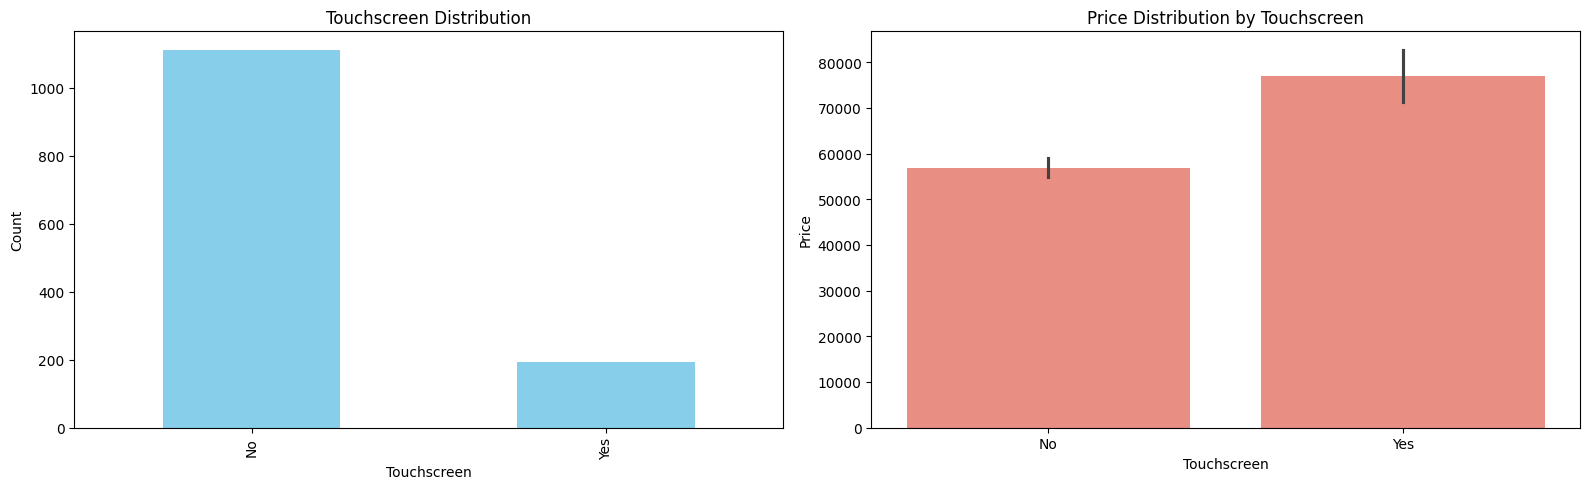

In [17]:
# data visualization for touchscreen and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plotting Touchscreen vs their count
laptop_dataset['Touchscreen'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Touchscreen Distribution')
axs[0].set_xlabel('Touchscreen')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

# Plotting Touchscreen vs Price
sns.barplot(x=laptop_dataset['Touchscreen'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Touchscreen')
axs[1].set_xlabel('Touchscreen')
axs[1].set_ylabel('Price')
axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23652\2626494066.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation


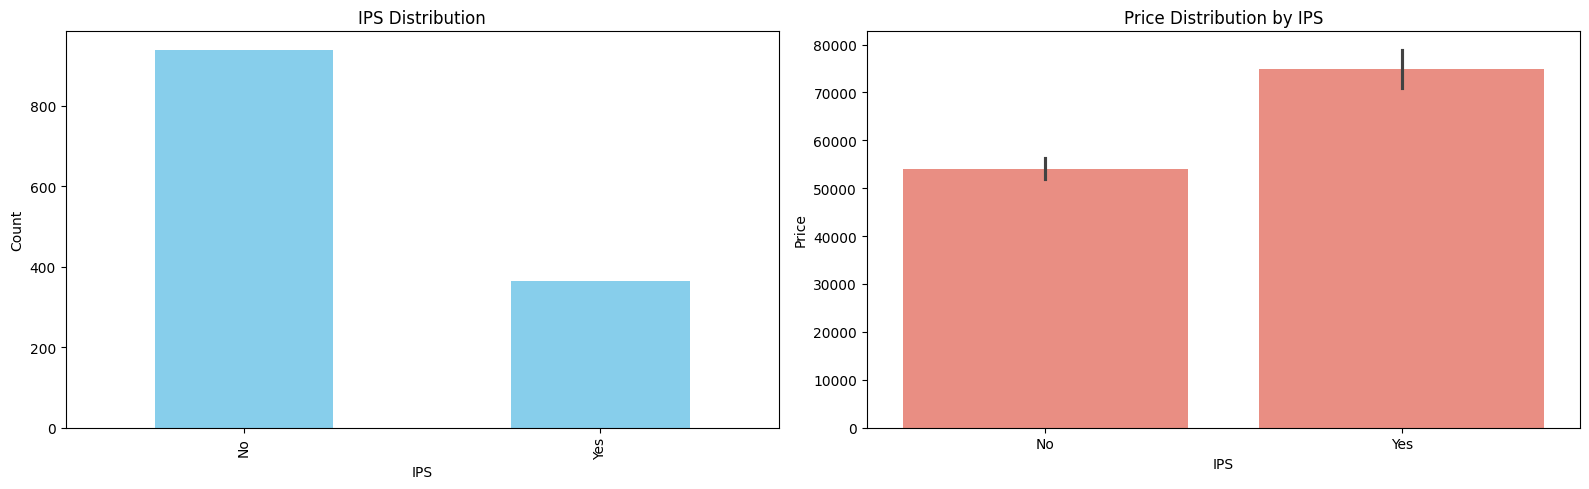

In [18]:
# data visualization for IPS and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plotting IPS vs their count
laptop_dataset['IPS'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('IPS Distribution')
axs[0].set_xlabel('IPS')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

# Plotting IPS vs Price
sns.barplot(x=laptop_dataset['IPS'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by IPS')
axs[1].set_xlabel('IPS')
axs[1].set_ylabel('Price')
axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

plt.tight_layout()
plt.show()

In [19]:
# extracting X & Y resolution of the screen in pixels
temp=[]

# as the screen resolution pixels always appears at the end of the data in ScreenResolution column, we split it on the basis of space and obtain the last element of the array
for res in laptop_dataset['ScreenResolution'].str.split(' '):
  temp.append(res[-1])
tp=pd.DataFrame(temp)[0].str.split('x',expand=True)
laptop_dataset["X_res"]=tp[0].astype("int64")
laptop_dataset["Y_res"]=tp[1].astype("int64")

In [20]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


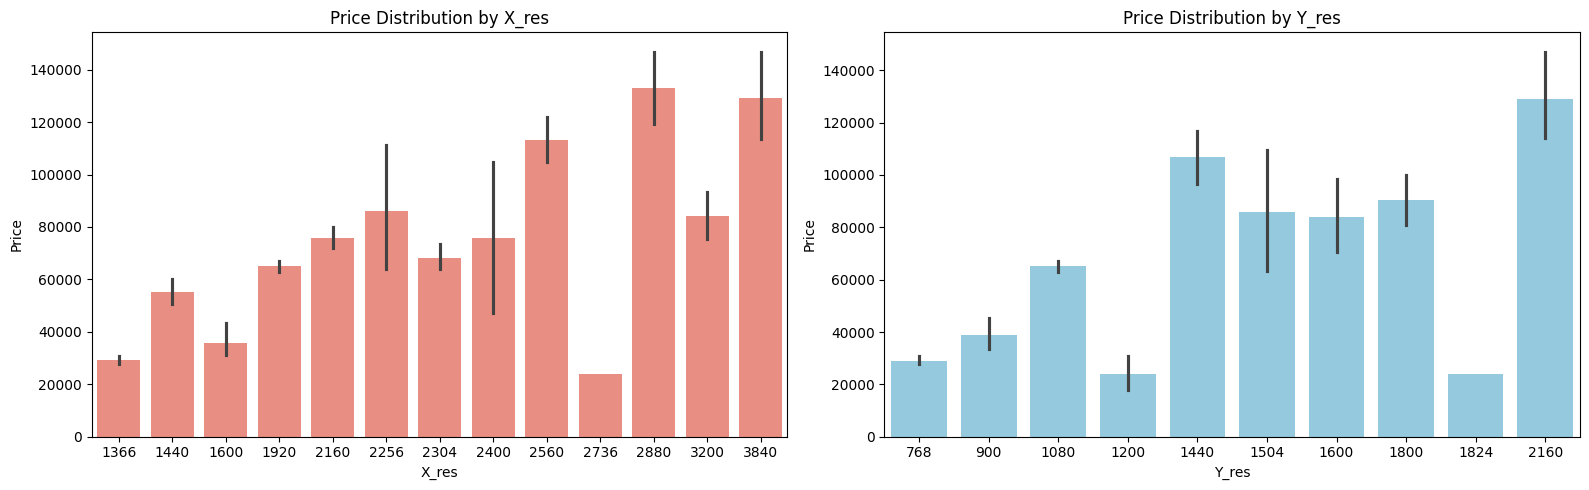

In [21]:
# data visualization for X_res and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plotting X_res vs Price
sns.barplot(x=laptop_dataset['X_res'], y=laptop_dataset['Price'], ax=axs[0], color='salmon')
axs[0].set_title('Price Distribution by X_res')
axs[0].set_xlabel('X_res')
axs[0].set_ylabel('Price')

# Plotting Y_res vs Price
sns.barplot(x=laptop_dataset['Y_res'], y=laptop_dataset['Price'], ax=axs[1], color='skyblue')
axs[1].set_title('Price Distribution by Y_res')
axs[1].set_xlabel('Y_res')
axs[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

##### It's clear that as the X and Y resolution increaases, the price of the laptop also increases, thus we compute a new feature called pixels per inches and add it to our dataset.

$$PPI = \frac{\sqrt{X_r^2 + Y_r^2}} {inches}$$


In [22]:
laptop_dataset['PPI']= ((laptop_dataset['X_res']**2) + (laptop_dataset['Y_res']**2))**0.5/laptop_dataset['Inches'].astype("float64")
# dropping columns which have been computed into a single column and are no longer needed in our dataset
laptop_dataset.drop(['ScreenResolution','X_res','Y_res','Inches'],axis=1,inplace=True)
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


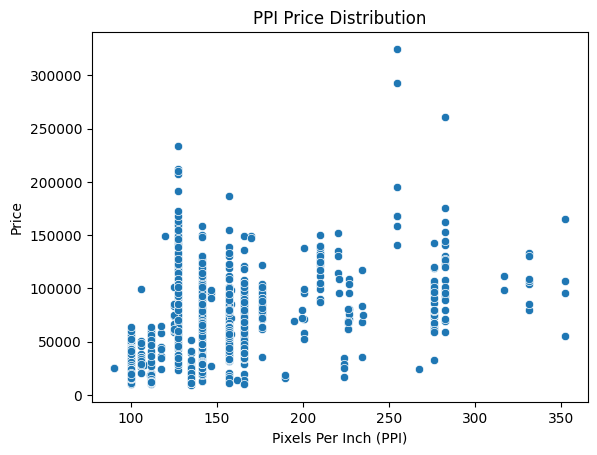

In [23]:
# data visualization for PPI and its relation with the price of the laptop
sns.scatterplot(x=laptop_dataset['PPI'], y=laptop_dataset['Price'])

plt.xlabel('Pixels Per Inch (PPI)')
plt.ylabel('Price')
plt.title('PPI Price Distribution')

plt.show()

## **Feature Engineering on CPU**

In [24]:
laptop_dataset['Cpu'].value_counts(ascending=False)[:10]

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      49
Intel Core i7 6700HQ 2.6GHz     43
Intel Core i3 7100U 2.4GHz      37
Name: count, dtype: int64

In [25]:
# checking for intel and AMD processors
laptop_dataset['Cpu'].apply(lambda x: "Intel" if "Intel" in x else ("AMD" if "AMD" in x else x)).value_counts()

Cpu
Intel                            1240
AMD                                62
Samsung Cortex A72&A53 2.0GHz       1
Name: count, dtype: int64

##### By far, I3, I5 & I7 are the most used intel processors

In [26]:
processors=[]
for processor in laptop_dataset['Cpu'].str.split(" "):
  if(processor[0]=='Intel'):
    if(processor[2]=='i3'):
      processors.append("Intel i3")
    elif(processor[2]=='i5'):
      processors.append("Intel i5")
    elif(processor[2]=='i7'):
      processors.append("Intel i7")
    else:
      processors.append("Other Intel")
  else:
    processors.append("AMD")
laptop_dataset['Processor']=processors
laptop_dataset.drop(['Cpu'],axis=1,inplace=True)
laptop_dataset.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor
322,Asus,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,58288.3200,0,0,157.350512,Intel i7
1278,Dell,Notebook,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.1200,0,0,100.454670,Other Intel
724,MSI,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0,0,127.335675,Intel i7
896,Dell,Gaming,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62,49497.1200,0,0,141.211998,Intel i7
253,Lenovo,2 in 1 Convertible,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37,98514.7200,1,1,158.482530,Intel i7
1113,HP,Ultrabook,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.16,104908.3200,0,0,165.632118,Intel i7
803,Dell,Notebook,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,93186.7200,1,0,282.423996,Intel i5
358,Dell,Notebook,8,2TB HDD,Intel HD Graphics 620,Windows 10,2.36,29696.6736,1,0,100.454670,Intel i5
508,HP,Ultrabook,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.34,70489.4400,0,1,165.632118,Intel i7
402,Lenovo,Notebook,8,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.10,60978.9600,0,1,141.211998,Intel i5


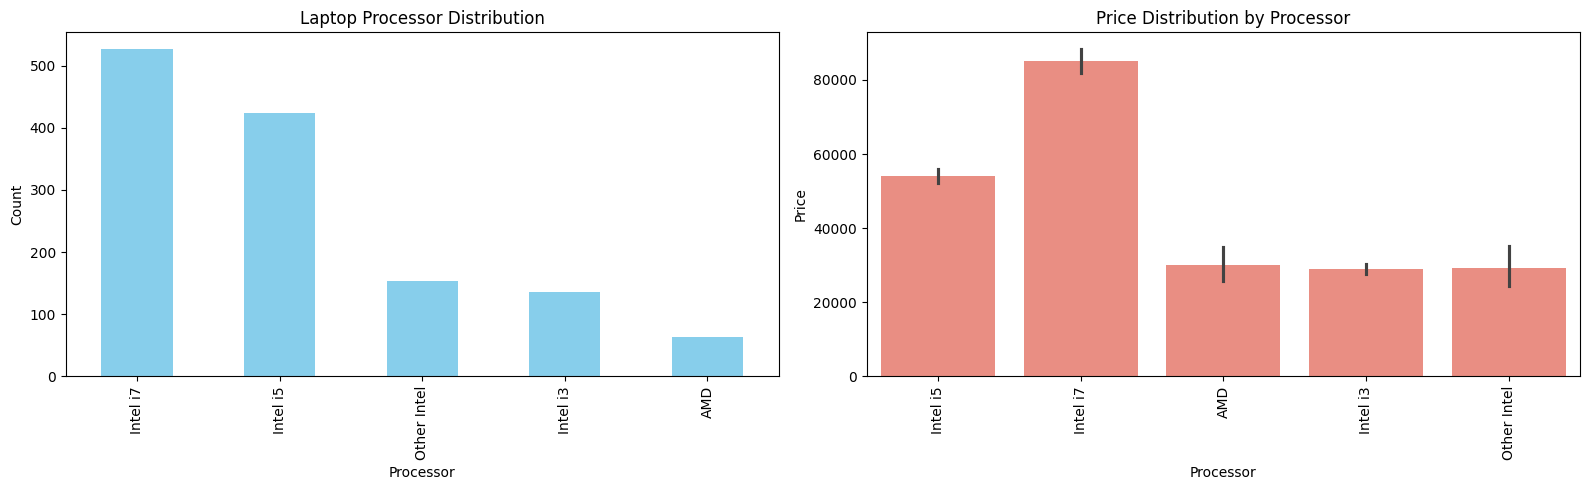

<Figure size 640x480 with 0 Axes>

In [27]:
# data visualization for Processor, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting Processor vs their count
laptop_dataset['Processor'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop Processor Distribution')
axs[0].set_xlabel('Processor')
axs[0].set_ylabel('Count')

# plotting Processor vs Price
sns.barplot(x=laptop_dataset['Processor'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Processor')
axs[1].set_xlabel('Processor')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

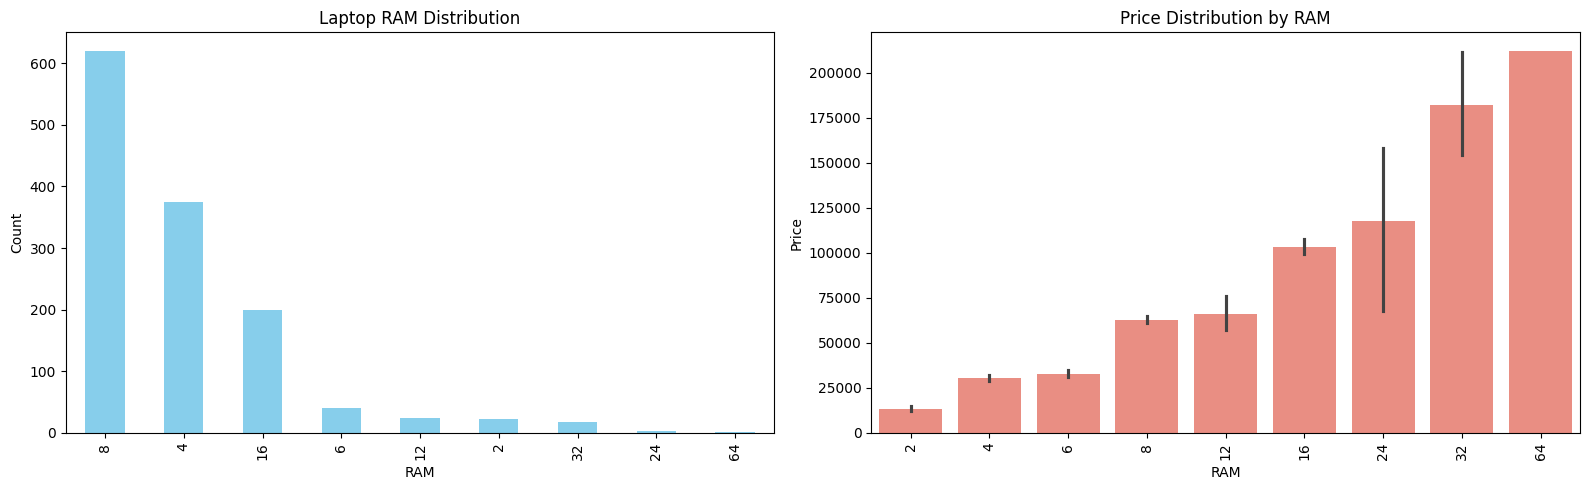

<Figure size 640x480 with 0 Axes>

In [28]:
# data visualization for RAM, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting RAM vs their count
laptop_dataset['Ram'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop RAM Distribution')
axs[0].set_xlabel('RAM')
axs[0].set_ylabel('Count')

# plotting Ram vs Price
sns.barplot(x=laptop_dataset['Ram'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by RAM')
axs[1].set_xlabel('RAM')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

## **Feature Engineering on Memory**

In [29]:
laptop_dataset['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [30]:
# removing units and decimal points from memory column
laptop_dataset['Memory'] = laptop_dataset['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('GB', '')
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('TB', '000')
laptop_dataset['Memory'].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\HP\AppData\Local\Temp\ipykernel_23652\2436233075.py:2: SyntaxWarning: invalid escape sequence '\.'
  laptop_dataset['Memory'] = laptop_dataset['Memory'].astype(str).replace('\.0', '', regex=True)


Memory
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

In [31]:
# there can be maximum 2 types of memory in a laptop
new=laptop_dataset["Memory"].str.split("+", n = 1, expand = True)
laptop_dataset["first"] = new[0].str.strip()
laptop_dataset["second"]= new[1].str.strip()

In [32]:
# creating a record of what type of memory is present in the laptop
laptop_dataset["Layer1HDD"] = laptop_dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer1SSD"] = laptop_dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer1Hybrid"] = laptop_dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer1Flash_Storage"] = laptop_dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# filling out missing columns
laptop_dataset['first'] = laptop_dataset['first'].str.replace(r'\D', '')
laptop_dataset["second"].fillna("0", inplace = True)
laptop_dataset['second'] = laptop_dataset['second'].str.replace(r'\D', '')

laptop_dataset["Layer2HDD"] = laptop_dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer2SSD"] = laptop_dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer2Hybrid"] = laptop_dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer2Flash_Storage"] = laptop_dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


# extrracting integer values
laptop_dataset["first"]=laptop_dataset["first"].str.split(' ',expand=True)[0].astype("int64")
laptop_dataset["second"]=laptop_dataset["second"].str.split(' ',expand=True)[0].astype("int64")

# assigning memory to their boolean values
laptop_dataset["HDD"]=(laptop_dataset["first"]*laptop_dataset["Layer1HDD"]+laptop_dataset["second"]*laptop_dataset["Layer2HDD"])
laptop_dataset["SSD"]=(laptop_dataset["first"]*laptop_dataset["Layer1SSD"]+laptop_dataset["second"]*laptop_dataset["Layer2SSD"])
laptop_dataset["Hybrid"]=(laptop_dataset["first"]*laptop_dataset["Layer1Hybrid"]+laptop_dataset["second"]*laptop_dataset["Layer2Hybrid"])
laptop_dataset["Flash_Storage"]=(laptop_dataset["first"]*laptop_dataset["Layer1Flash_Storage"]+laptop_dataset["second"]*laptop_dataset["Layer2Flash_Storage"])

# dropping unnecessary columns
laptop_dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23652\2296876167.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laptop_dataset["second"].fillna("0", inplace = True)


In [33]:
laptop_dataset.drop(['Memory'],axis=1,inplace=True)
laptop_dataset.sample(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
297,Dell,Workstation,16,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,0,0,127.335675,Intel i7,0,256,0,0
311,Dell,Ultrabook,16,Intel UHD Graphics 620,Windows 10,1.21,133146.7200,1,1,331.264236,Intel i7,0,1000,0,0
20,Asus,Netbook,2,Intel HD Graphics 400,Windows 10,0.98,10224.4320,0,0,135.094211,Other Intel,0,0,0,32
434,Lenovo,Notebook,16,Nvidia Quadro M2200M,Windows 10,2.50,130482.7200,0,0,141.211998,Intel i7,0,512,0,0
708,Lenovo,Notebook,8,Intel HD Graphics 520,Windows 10,1.80,63456.4800,0,0,157.350512,Intel i5,0,256,0,0
1137,Dell,Notebook,8,AMD Radeon R7 M445,Windows 10,2.50,41771.5200,0,0,100.454670,Intel i5,1000,0,0,0
334,Asus,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.7200,0,0,141.211998,Intel i7,0,256,0,0
1138,MSI,Gaming,16,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.7200,0,0,127.335675,Intel i7,1000,256,0,0
955,Dell,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,4.36,168045.1200,0,1,254.671349,Intel i7,1000,512,0,0
392,Acer,Notebook,12,Nvidia GeForce MX130,Windows 10,2.20,36975.7872,0,1,100.454670,Intel i5,1000,0,0,0


## **Feature Engineering on GPU**

In [34]:
laptop_dataset['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [35]:
# extracting GPU brands
laptop_dataset['Gpu']=laptop_dataset['Gpu'].str.split(' ',expand=True)[0]
laptop_dataset.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
718,Mediacom,Notebook,4,Intel,Windows 10,1.40,14119.20,0,1,161.725391,Other Intel,32,0,0,0
906,HP,Netbook,8,Intel,Windows 10,1.26,79014.24,0,0,176.232574,Intel i7,0,512,0,0
640,Lenovo,Gaming,8,Nvidia,Windows 10,2.50,59087.52,0,1,141.211998,Intel i7,1000,128,0,0
252,Asus,Notebook,4,AMD,Windows 10,1.68,24988.32,0,0,100.454670,AMD,1000,0,0,0
521,HP,Ultrabook,8,Intel,Windows 10,1.32,74538.72,0,1,165.632118,Intel i7,0,256,0,0


In [36]:
laptop_dataset['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [37]:
# we remove ARm as it is an outlier
laptop_dataset=laptop_dataset[laptop_dataset['Gpu']!="ARM"]

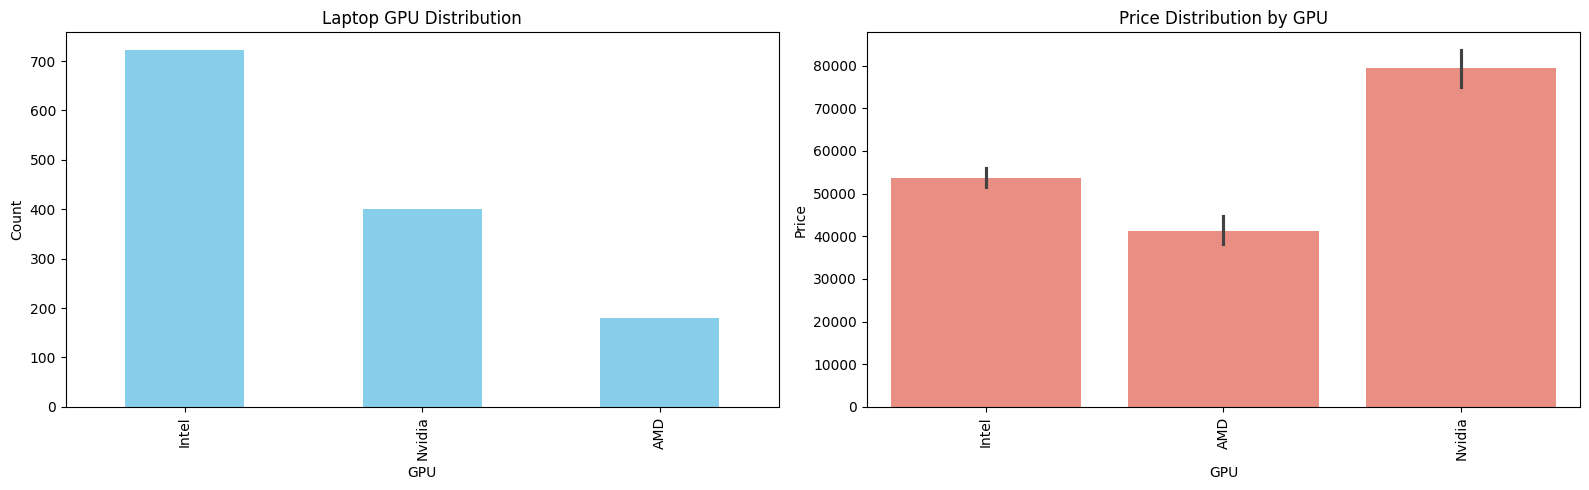

<Figure size 640x480 with 0 Axes>

In [38]:
# data visualization for GPU, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting GPU vs their count
laptop_dataset['Gpu'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop GPU Distribution')
axs[0].set_xlabel('GPU')
axs[0].set_ylabel('Count')

# plotting GPU vs Price
sns.barplot(x=laptop_dataset['Gpu'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by GPU')
axs[1].set_xlabel('GPU')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

## **Feature Engineering on Operating System**

In [39]:
laptop_dataset['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [40]:
# we can reduce the number of categories
laptop_dataset['OpSys']=laptop_dataset['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else("macOS" if "macOS" in x else("macOS" if "Mac" in x else "others")))
laptop_dataset['OpSys'].value_counts()

OpSys
Windows    1125
others      156
macOS        21
Name: count, dtype: int64

In [41]:
laptop_dataset.sample(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
646,Acer,Ultrabook,8,Intel,Windows,1.80,48964.32,0,1,157.350512,Intel i5,0,256,0,0
743,Lenovo,2 in 1 Convertible,8,Intel,Windows,1.70,53226.72,1,0,157.350512,Intel i5,0,256,0,0
485,Lenovo,Notebook,8,Intel,Windows,1.75,55890.72,0,1,157.350512,Intel i5,0,256,0,0
907,Acer,Notebook,4,Intel,others,2.20,19127.52,0,1,141.211998,Other Intel,0,0,0,16
1138,MSI,Gaming,16,Nvidia,Windows,3.78,127818.72,0,0,127.335675,Intel i7,1000,256,0,0
524,Dell,Notebook,8,AMD,others,2.80,47365.92,0,1,127.335675,Intel i5,1000,128,0,0
745,Acer,Notebook,2,Intel,others,1.68,17582.40,0,0,111.935204,Other Intel,0,0,0,32
1225,Asus,Notebook,4,Intel,Windows,2.65,16463.52,0,0,100.454670,Other Intel,1000,0,0,0
2,HP,Notebook,8,Intel,others,1.86,30636.00,0,0,141.211998,Intel i5,0,256,0,0
662,Lenovo,Notebook,4,Intel,Windows,2.20,28504.80,0,0,141.211998,Intel i5,500,0,0,0


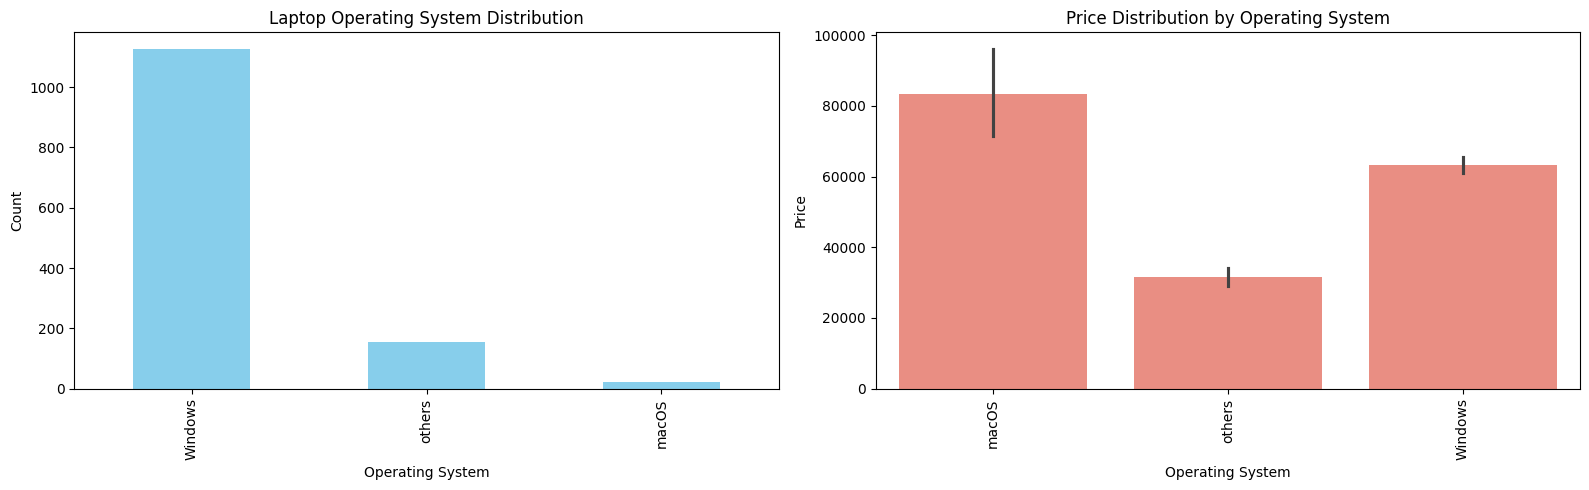

<Figure size 640x480 with 0 Axes>

In [42]:
# data visualization for Operating System, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting Operating System vs their count
laptop_dataset['OpSys'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop Operating System Distribution')
axs[0].set_xlabel('Operating System')
axs[0].set_ylabel('Count')

# plotting Operating System vs Price
sns.barplot(x=laptop_dataset['OpSys'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Operating System')
axs[1].set_xlabel('Operating System')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23652\2811860574.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_dataset['Weight'], ax=axs[0])


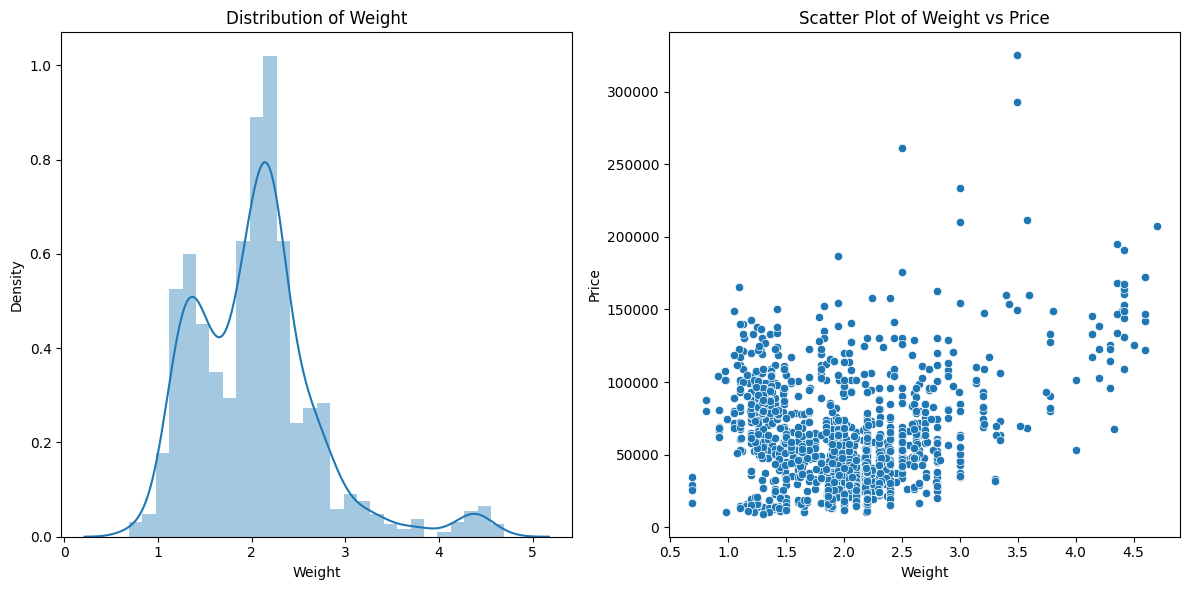

In [43]:
# perforing data visualization on Weight column of the laptop dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Distribution plot of Laptop Weights
sns.distplot(laptop_dataset['Weight'], ax=axs[0])
axs[0].set_title('Distribution of Weight')
axs[0].set_xlabel('Weight')
axs[0].set_ylabel('Density')

# Scatter plot of Laptop Weights vs Laptop Price
sns.scatterplot(x='Weight', y='Price', data=laptop_dataset, ax=axs[1])
axs[1].set_title('Scatter Plot of Weight vs Price')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

<Axes: >

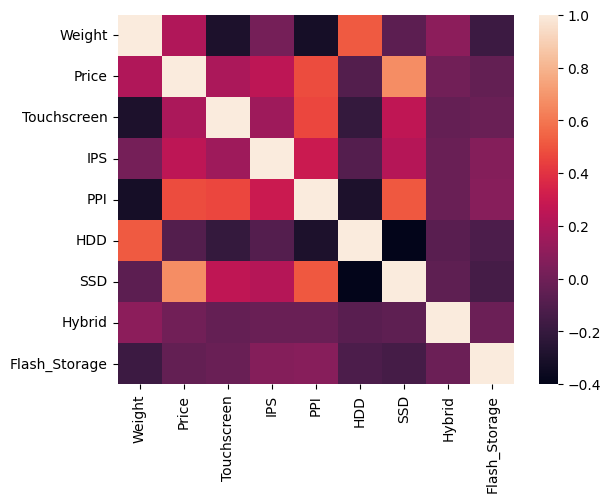

In [44]:
# creating a heatmap of the correlations
num = laptop_dataset.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num.corr())

In [45]:
num.corr()

,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage
Weight,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818,0.095122,-0.179165
Price,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660,0.007942,-0.040067
Touchscreen,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577,-0.039591,-0.020809
IPS,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311,-0.022505,0.068616
PPI,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437,-0.020095,0.076479
HDD,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750,-0.076674,-0.117165
SSD,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000,-0.059845,-0.147407
Hybrid,0.095122,0.007942,-0.039591,-0.022505,-0.020095,-0.076674,-0.059845,1.000000,-0.014307
Flash_Storage,-0.179165,-0.040067,-0.020809,0.068616,0.076479,-0.117165,-0.147407,-0.014307,1.000000


In [46]:
# hybrid and flash storage have a very low correlation with Price and thus we can drop them from our datset
laptop_dataset.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23652\1361595709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_dataset['Price'], ax=axs[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_23652\1361595709.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop_dataset['Price']), ax=axs

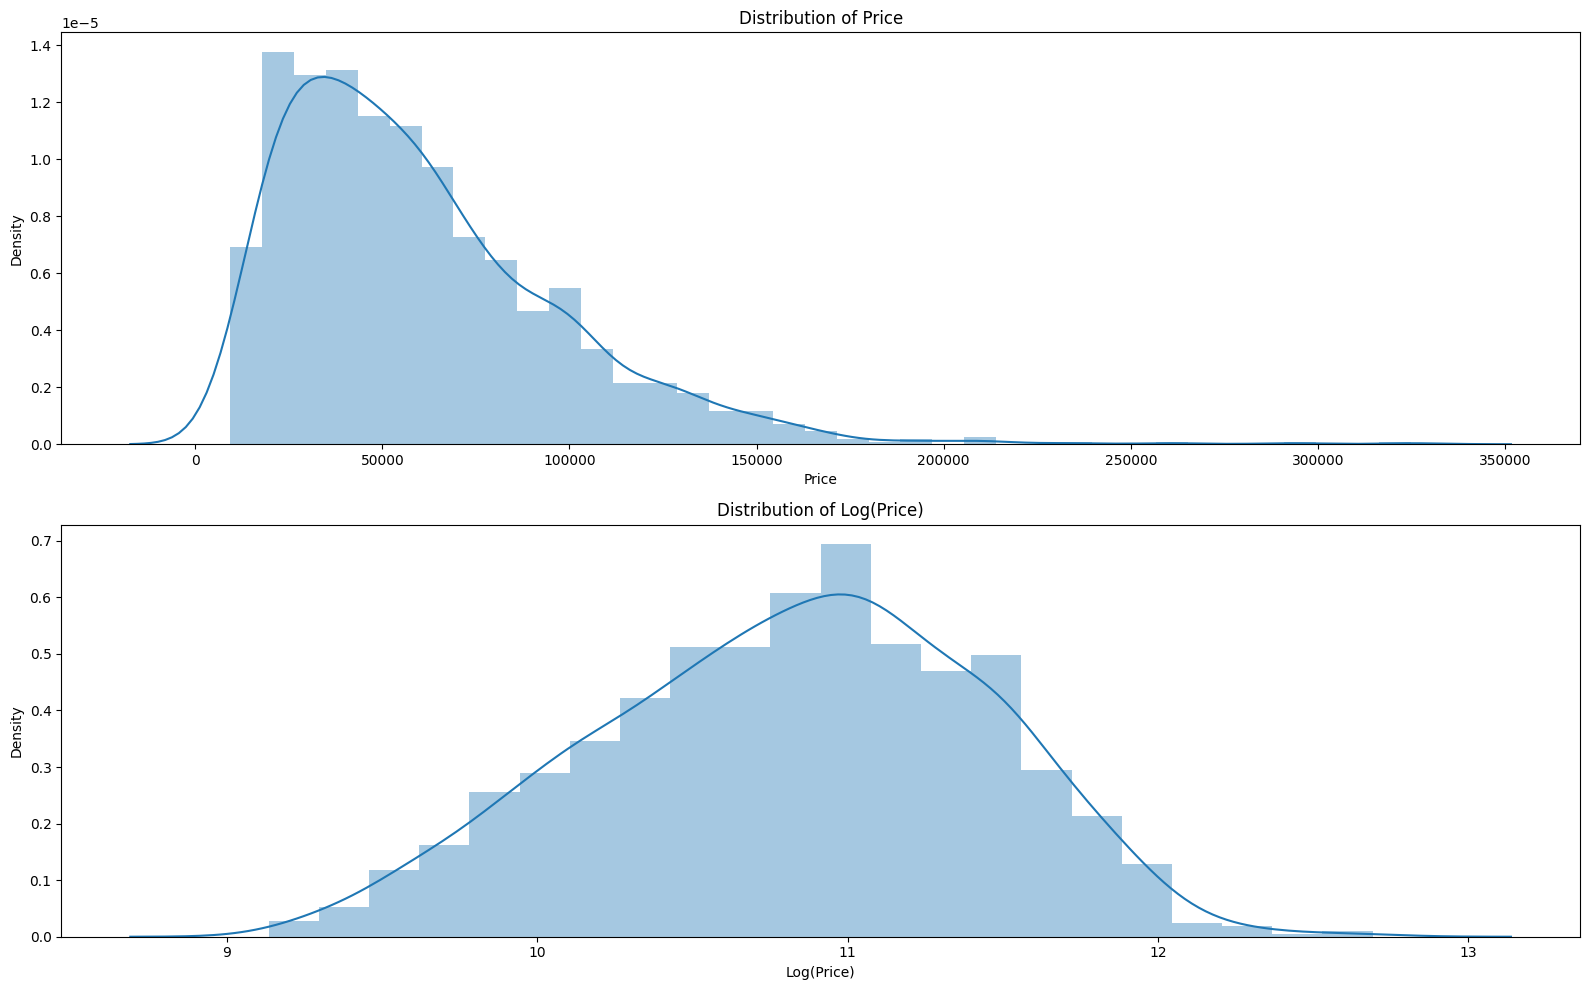

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(16, 10))

# Distribution plot for 'Price'
sns.distplot(laptop_dataset['Price'], ax=axs[0])
axs[0].set_title('Distribution of Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Density')

# Distribution plot for logarithm of 'Price'
sns.distplot(np.log(laptop_dataset['Price']), ax=axs[1])
axs[1].set_title('Distribution of Log(Price)')
axs[1].set_xlabel('Log(Price)')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

Using logarithm function on the output target value 'Price' helps to remove the right-skewness from the dataset and makes it ideal for our learning algorithms to learn from

## **Creating our datasets**

In [48]:
X=laptop_dataset.drop(['Price'],axis=1)
y=np.log(laptop_dataset['Price'])
X.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,PPI,Processor,HDD,SSD
772,Toshiba,Notebook,4,Intel,Windows,1.75,0,1,111.935204,Intel i5,0,128


## **Splitting Test and Train datasets**

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=22)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1041, 12) (1041,)
(261, 12) (261,)


## **Handling Categorical Features**

In [50]:
X_train.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,PPI,Processor,HDD,SSD
1085,HP,Notebook,4,Intel,Windows,1.54,0,0,157.350512,Intel i5,500,0


In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Performing one hot encoding on the categorical features
encoder = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 4, 9])
], remainder="passthrough")

encoder.fit(X)
X_train_encoded=encoder.transform(X_train)
X_test_encoded=encoder.transform(X_test)

with open("encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

# **Linear Regression**

In [52]:
from sklearn.linear_model import LinearRegression

linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train_encoded,y_train)
y_predicted=linear_regression_model.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(linear_regression_model.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

import joblib
with open('Linear_Regression_model.pkl', 'wb') as file:
    joblib.dump(linear_regression_model, file)
# files.download("Linear_Regression_model.pkl")

Mean Absolute Error (MAE): 0.21039621214199397
Mean Squared Error (MSE): 0.0690517190166291
R2 Training score: 0.7949076572174626
R2 Testing score: 0.8304095218877675


## **SVM Regressor**

In [53]:
from sklearn.svm import SVR

SVR_regressor=SVR(kernel='rbf',C=10000,epsilon=0.1)
SVR_regressor.fit(X_train_encoded,y_train)
y_predicted=SVR_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(SVR_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('SVM_Regressor_model.pkl', 'wb') as file:
  pickle.dump(SVR_regressor, file)
# files.download("SVM_Regressor_model.pkl")

Mean Absolute Error (MAE): 0.2072929848231862
Mean Squared Error (MSE): 0.10707279515498018
R2 Training score: 0.8398698557995826
R2 Testing score: 0.7370300583136349


# **Decision Tree Regressor**

In [54]:
from sklearn.tree import DecisionTreeRegressor

Decision_tree_regressor=DecisionTreeRegressor(max_depth=8)
Decision_tree_regressor.fit(X_train_encoded,y_train)
y_predicted=Decision_tree_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(Decision_tree_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('Decision_tree_regressor_model.pkl', 'wb') as file:
  pickle.dump(Decision_tree_regressor, file)
# files.download("Decision_tree_regressor_model.pkl")

Mean Absolute Error (MAE): 0.18300229778296856
Mean Squared Error (MSE): 0.05589604483922287
R2 Training score: 0.894012336433208
R2 Testing score: 0.8627197540645766


## **Random Forest Regression**

In [55]:
from sklearn.ensemble import RandomForestRegressor

Random_forest_regressor=RandomForestRegressor(n_estimators=100,random_state=2,max_samples=0.5,max_features=0.75,max_depth=15)
Random_forest_regressor.fit(X_train_encoded,y_train)
y_predicted=Random_forest_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(Random_forest_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('Random_forest_regressor_model.pkl', 'wb') as file:
    pickle.dump(Random_forest_regressor, file)
# files.download("Random_forest_regressor_model.pkl")

Mean Absolute Error (MAE): 0.16548542230348626
Mean Squared Error (MSE): 0.04795816747074708
R2 Training score: 0.9432518863792929
R2 Testing score: 0.8822151183695824


## **XGBoost Regressor**

In [59]:
from xgboost import XGBRegressor

XGB_regressor=XGBRegressor(n_estimators=30,max_depth=4,learning_rate=0.3)
XGB_regressor.fit(X_train_encoded,y_train)
y_predicted=XGB_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(XGB_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('XGBoost_regressor_model.pkl', 'wb') as file:
    joblib.dump(XGB_regressor, file)
# files.download("XGBoost_regressor_model.pkl")

Mean Absolute Error (MAE): 0.17102617851984125
Mean Squared Error (MSE): 0.04670545450683051
R2 Training score: 0.9122397884504729
R2 Testing score: 0.8852917715436597


## **Standarizing the data before passing through Neural Networks**

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_encoded)
X_test_scaled=scaler.transform(X_test_encoded)

# **Artificial Neural Network (ANN)**

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

ANN_model=Sequential()
ANN_model.add(Dense(44,activation="relu",input_dim=X_train_scaled.shape[1]))
ANN_model.add(Dense(48,activation="relu"))
ANN_model.add(Dense(60,activation="relu"))
ANN_model.add(Dense(52,activation="relu"))
ANN_model.add(Dense(44,activation="relu"))
ANN_model.add(Dense(8,activation="relu"))
ANN_model.add(Dense(36,activation="relu"))
ANN_model.add(Dense(40,activation="relu"))
ANN_model.add(Dense(1,activation="linear"))

ANN_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mean_absolute_error", metrics=["mae"])
result=ANN_model.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=16, epochs=200, verbose=0)

y_predicted=ANN_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(y_train,ANN_model.predict(X_train_scaled))
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('ANN_model.pkl', 'wb') as file:
    pickle.dump(ANN_model, file)
# files.download("ANN_model.pkl")

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 0.19990827622863958
Mean Squared Error (MSE): 0.06918247400999407
R2 Training score: 0.8842126551117573
R2 Testing score: 0.8300883886537782


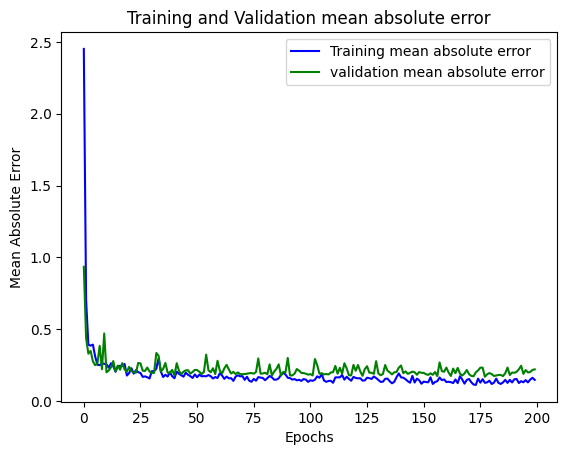

In [71]:
loss_train = result.history['mae']
loss_val = result.history['val_mae']
epochs = range(0,200)
len(loss_train)
plt.plot(epochs, loss_train, 'b', label='Training mean absolute error')
plt.plot(epochs, loss_val, 'g', label='validation mean absolute error')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
# plt.savefig("ANN_model_MAE.png")
# files.download("ANN_model_MAE.png")

# **Recuurent Neural Network (RNN)**

In [72]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

RNN_model=Sequential()
RNN_model.add(Dense(44,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(48,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(60,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(52,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(44,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(8,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(36,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(40,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(1,activation="linear"))

RNN_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mean_absolute_error", metrics=["mae"])
RNN_result=RNN_model.fit(X_train_scaled, y_train, validation_split=0.25, batch_size=64, epochs=200, verbose=0)

y_predicted=RNN_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(y_train,RNN_model.predict(X_train_scaled))
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('RNN_model.pkl', 'wb') as file:
    pickle.dump(RNN_model, file)
# files.download("RNN_model.pkl")

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error (MAE): 0.1942943657169611
Mean Squared Error (MSE): 0.06570281171697567
R2 Training score: 0.8961134783738001
R2 Testing score: 0.8386344118425707


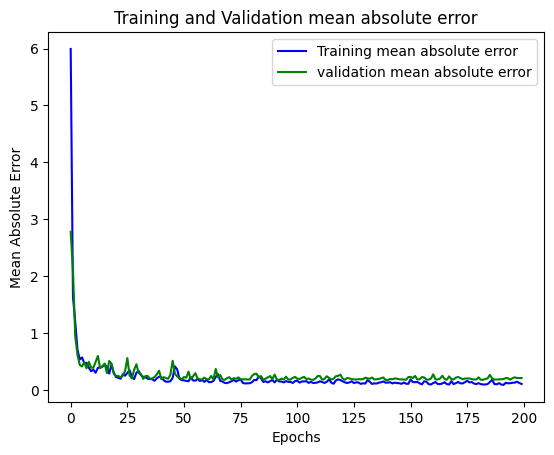

In [73]:
loss_train = RNN_result.history['mae']
loss_val = RNN_result.history['val_mae']
epochs = range(0,200)
len(loss_train)
plt.plot(epochs, loss_train, 'b', label='Training mean absolute error')
plt.plot(epochs, loss_val, 'g', label='validation mean absolute error')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
# plt.savefig("RNN_model_MAE.png")
# files.download("RNN_model_MAE.png")

In [74]:
pickle.dump(laptop_dataset, open('laptop_dataset.pkl', 'wb'))